<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/enem-2/main_enem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# enem-2

## Importing

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from google.colab import files

In [44]:
!pip install tpot

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=953535e69df0c7e276ef74ee6d8cc80330df699651fdba381303d435935351c2
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [45]:
from tpot import TPOTRegressor

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.shape, test.shape

((8418, 167), (4576, 47))

## Droping

In [4]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,1.0,1.0,1.0,1.0,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,3.0,1.0,4.0,5.0,NaN,A,A,A,A,A,A,A,A,A


In [5]:
test.drop(labels=['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 
                  'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
           axis=1, inplace=True)

In [6]:
nota_mt = train.NU_NOTA_MT
nota_mt.shape

(8418,)

In [7]:
train = train[test.columns].join(nota_mt)
train.shape, test.shape

((8418, 36), (4576, 35))

In [8]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0


In [9]:
train_inscrição = train.pop("NU_INSCRICAO")
test_inscrição = test.pop("NU_INSCRICAO")

In [10]:
train.isnull().sum()

CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 5807
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    5807
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               1
TP_PRESENCA_CH               1
TP_PRESENCA_LC               1
NU_NOTA_CN                2058
NU_NOTA_CH                2058
NU_NOTA_LC                2191
TP_LINGUA                    1
TP_STATUS_REDACAO         2191
NU_NOTA_COMP1             2191
NU_NOTA_COMP2             2191
NU_NOTA_COMP3             2191
NU_NOTA_COMP4             2191
NU_NOTA_

In [11]:
print(train.TP_ENSINO.median(), train.TP_DEPENDENCIA_ADM_ESC.median())
train.TP_ENSINO.fillna(1, inplace=True)
train.TP_DEPENDENCIA_ADM_ESC.fillna(2, inplace=True)
test.TP_ENSINO.fillna(1, inplace=True)
test.TP_DEPENDENCIA_ADM_ESC.fillna(2, inplace=True)

1.0 2.0


In [12]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

## Modeling

In [13]:
train = pd.get_dummies(train)
test= pd.get_dummies(test)

In [14]:
scaler = StandardScaler()
scaler = scaler.fit_transform(train)

In [15]:
x = train.drop("NU_NOTA_MT", axis=1)
y = train["NU_NOTA_MT"]

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=.3, random_state=0)
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((5892, 61), (2526, 61), (5892,), (2526,))

In [16]:
ytrain = ytrain.to_numpy().reshape(-1,1)

In [25]:
mdl = LinearRegression(normalize=True)
mdl.fit(xtrain, ytrain)
p = mdl.predict(xval)
s = r2_score(yval, p)
s #0.9142450356466628 normalize=False

0.9142454578782764

In [28]:
mdl_ridge = Ridge().fit(xtrain, ytrain)
p_ridge = mdl_ridge.predict(xval)
r2_score(yval, p_ridge)

0.9142810072382273

In [29]:
mdl_lasso = Lasso().fit(xtrain, ytrain)
p_lasso = mdl_lasso.predict(xval)
r2_score(yval, p_lasso)

0.9099478559835295

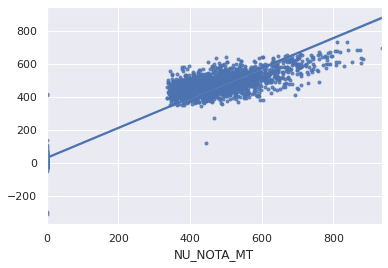

In [18]:
sns.regplot(yval, p, marker=".");

In [19]:
pred = mdl.predict(test)

In [20]:
for n in range(0, len(pred)):
  if pred[n] < 300:
    pred[n] = 0
pred = np.round(pred, 1)
pred

array([[427.9],
       [446.2],
       [559.3],
       ...,
       [619.4],
       [484.9],
       [  0. ]])

## AUTO ML

In [48]:
tp = TPOTRegressor(generations=10, verbosity=2, scoring="r2")

tp.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Generation 1 - Current best internal CV score: 0.9202713535579257
Generation 2 - Current best internal CV score: 0.9208639412644514
Generation 3 - Current best internal CV score: 0.9209141165433161
Generation 4 - Current best internal CV score: 0.9218546694484895
Generation 5 - Current best internal CV score: 0.9218546694484895

TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=5, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              log_file=<ipykernel.iostream.OutStream object at 0x7fb1d23a05c0>,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring='r2', subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [50]:
print(tp.score(xval, yval))

0.9277126951433622


## Saving

In [21]:
resp = pd.DataFrame(pred, index=test_inscrição)
resp.columns = ['NU_NOTA_MT']
resp

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,427.9
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,446.2
b38a03232f43b11c9d0788abaf060f7366053b6d,559.3
70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0
715494628a50142ce8cb17191cfe6d0f3cae0934,553.2
...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,439.6
a75fa8770257e7c9368d059fe53d9ef431f4bdef,454.4
655fa6306720ff16e825903b5422a46608a77545,619.4


In [ ]:
resp.to_csv('answer.csv')
files.download('answer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Results
* 1º: 93.112414% padrão
* 2º: 93.383744% round 0
* 3º: 93.383173% round 1